In [1]:
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [2]:
try:
    conn=pg.connect("dbname='footballstats' user='rschen1' password='password' host = 'fantasytweets.ckjgi4dhbxfi.us-east-2.rds.amazonaws.com' port = '5432'")
except:
    print("I am unable to connect to the database.")
cur = conn.cursor()

In [3]:
def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

In [4]:
cur.execute("SELECT mp.*, ao.*, ad.* FROM main_players mp, advanced_offense ao, advanced_defense ad WHERE mp.player_team = ao.team AND mp.nfl_year = ao.nfl_year+1 AND mp.opponent = ad.team AND mp.nfl_year = ad.nfl_year+1;") 
mp_df = cur.fetchall()
mp_df = pd.DataFrame(mp_df, columns=[x.name for x in cur.description])

In [5]:
mp_df = df_column_uniquify(mp_df)

In [6]:
mp_df.drop(['team', 'team_1'], axis=1, inplace=True)

In [8]:
mp_df.to_csv('main_players_pca.csv')

In [9]:
x = mp_df.iloc[:, 17:]
# Separating out the target
y = mp_df['fant_pt']
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pca = PCA(n_components = 54)
pca.fit(X_train)

PCA(n_components=54)

Text(0.5, 1.0, 'Scree Plot of Principal Components')

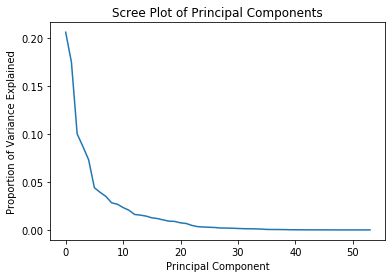

In [11]:
principal_components = pca.explained_variance_ratio_
plt.plot(principal_components)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot of Principal Components')

In [13]:
pca = PCA(n_components = 30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression   
classifier = LinearRegression() 
classifier.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
mean_squared_error(y_pred, y_test)

45.11963659067637

In [17]:
mean_absolute_error(y_pred, y_test)

5.229811817483082

In [18]:
rmse(y_pred, y_test)

6.717115198556325